# TimeSeriesAnalysis-ARIMA
This project is aimed at doing time series forecast using AutoRegressive Integrated Moving Average, ARIMA. The dataset used is the air passenger dataset.

In [20]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
import warnings


%matplotlib inline

In [2]:
# load data
data = pd.read_csv('AirPassengers.csv')

In [3]:
# data exploration - visualization and wrangling
print(data.shape)
data

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


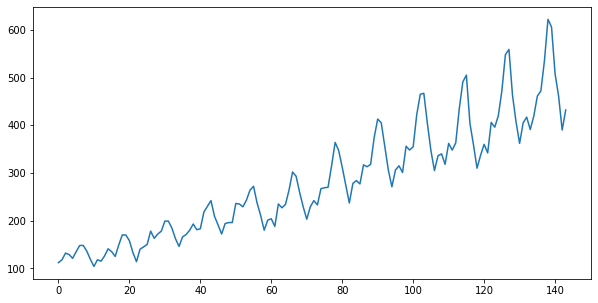

In [14]:
# visualise the time series
plt.figure(figsize=(10,5))
#import rcParams
#from matplotlib.pyplot import rcParams
#rcParamsParams['figure.figsize'] = 10, 5
plt.plot(data['#Passengers'])

In [4]:
from datetime import timedelta

In [15]:
data.Month[1]

'1949-02'

In [13]:
# Reloading data - parse the date string into datetime formate and reload data
def parser(x):
    return datetime.strptime(x, '%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=[0], date_parser=parser)
data.head()
#data['Month'] = pd.to_datetime(data.Month, infer_datetime_format=True)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
# set months as the index
data = data.set_index('Month')
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
data.shape

(144, 1)

In [15]:
# renaming the column
#data.columns = ['passengers']
data = data.rename(columns={'#Passengers' : 'passengers'})
data.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of air passengers')

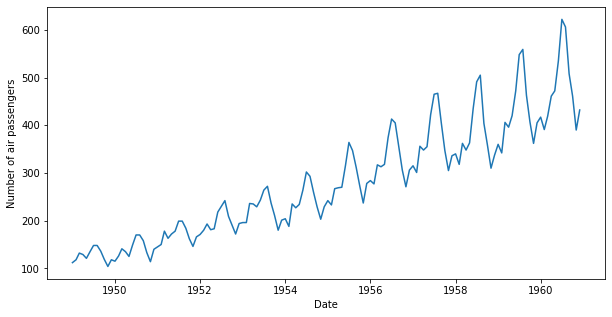

In [18]:
# plot the wrangled data
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,5))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

Shows trend!

## Testing for stationarity
1. Using autocorrelation plot function

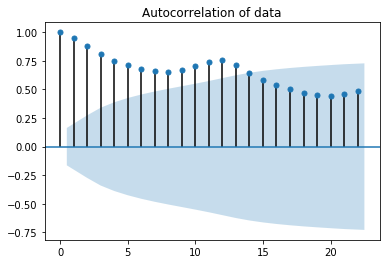

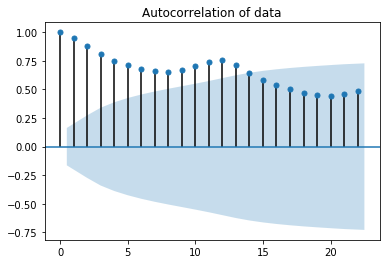

In [46]:
plot_acf(data, title='Autocorrelation of data')

#data.diff(periods=1)[1:].plot()

Plot shows data not stationary since autocorrelation decays slowly
2. Calculating the rolling statistics

In [32]:
rolMean = data.rolling(window=12).mean()
rolStd = data.rolling(window=12).std()
print(rolMean)
print(rolStd)

            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]
            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling mean and standard deviation')

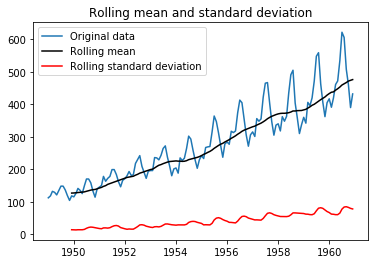

In [38]:
# Plot the rolling statistics for data
data_plot = plt.plot(data, label='Original data')
rolMean_plot = plt.plot(rolMean,color='black', label='Rolling mean')
rolStd_plot = plt.plot(rolStd,color='red', label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')


The plot above shows the data is not stationery. Apart from the trend, the rolling mean (moving average) and rolling std(moving std) are not constant. Let us perform the adf test too
3. Performing augmented Dickey Fuller test

In [38]:
adfuller?

In [37]:
adfTest = adfuller(data.passengers, autolag='AIC')
adfTest

(0.8153688792060491,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [39]:
adfResult = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', 'no of lag used', 'no of observation used']) 
adfResult

Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
dtype: float64

In [41]:
adfTest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [45]:
for key, value in adfTest[4].items():
    adfResult['Critical Value (%s)'%key] = value

print(adfResult)


Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [ ]:
plt.plot(timeseries, label='Original data')
    plt.plot(movingAverage,color='black', label='Rolling mean')
    plt.plot(movingStd,color='red', label='Rolling standard deviation')

In [55]:
# defining a stationatity test function for both rolling stat and adf tests
def stationarity_test(timeseries):
    
    # plotting rollin statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    data_ = plt.plot(timeseries, label='Original data')
    rolMean_plot = plt.plot(movingAverage,color='black', label='Rolling mean')
    rolStd_plot = plt.plot(movingStd,color='red', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling statistics: Rolling mean and standard deviation')
    
    # performing adf test
    print('Augmented Dickey Fuller Result')
    adfTest = adfuller(timeseries['passengers'], autolag='AIC')
    adfResult = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', 'no of lag used',
                                               'no of observation used']) 
    for key, value in adfTest[4].items():
        adfResult['Critical Value{}'.format(key)] = value
        
    print(adfResult)
    
    

Augmented Dickey Fuller Result
Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
Critical Value1%           -3.481682
Critical Value5%           -2.884042
Critical Value10%          -2.578770
dtype: float64


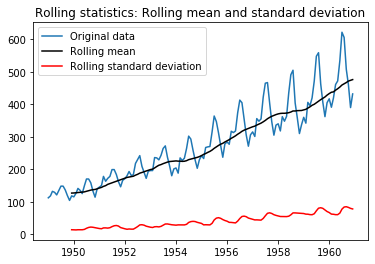

In [56]:
stationarity_test(data)

The adf test also shows that data is not stationary as shown in the plot since p-value > 0.05  (test statiastics > critical value)  --> accept null hypothesis(data not stationary)
Therefore, we must first find a way of making the data stationery

 ## Making time series stationary
 To make time series stationarity, we have to apply some transformation to the data e.g, log,exp e.t.c and afterwards, test the stationarity again.
 1. log transformation

In [28]:
dataLog = np.log(data)
print(dataLog.head())

            passengers
Month                 
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791


Augmented Dickey Fuller Result
Test Statistics            -1.717017
p-value                     0.422367
no of lag used             13.000000
no of observation used    130.000000
Critical Value1%           -3.481682
Critical Value5%           -2.884042
Critical Value10%          -2.578770
dtype: float64


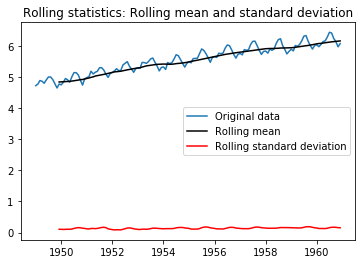

In [95]:
stationarity_test(dataLog)

Still moving average not stationary since p-value > 0.05, although movingstd is almost constant. Let us apply another transformation!
2. subtracting the dataLog moving average from dataLog 

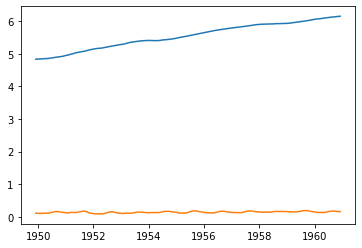

In [58]:
movingAverage = dataLog.rolling(window=12).mean()
movingStd = dataLog.rolling(window=12).std()
dataLogMinusMovingAverage = dataLog - movingAverage
dataLogMinusMovingAverage.head(15)

plt.plot(movingAverage)
plt.plot(movingStd)

In [59]:
# no of null rows
dataLogMinusMovingAverage.isnull().sum(axis=0)

passengers    11
dtype: int64

In [60]:
# removing rows with no data
dataLogMinusMovingAverage.dropna(inplace=True)
len(dataLogMinusMovingAverage)

133

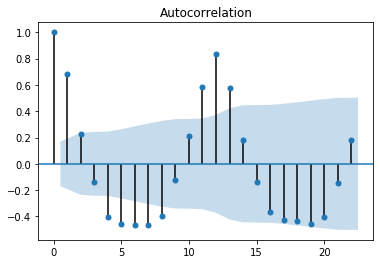

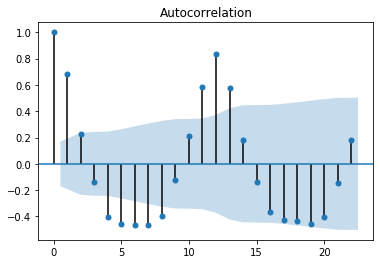

In [70]:
plot_acf(dataLogMinusMovingAverage)

Augmented Dickey Fuller Result
Test Statistics            -3.162908
p-value                     0.022235
no of lag used             13.000000
no of observation used    119.000000
Critical Value1%           -3.486535
Critical Value5%           -2.886151
Critical Value10%          -2.579896
dtype: float64


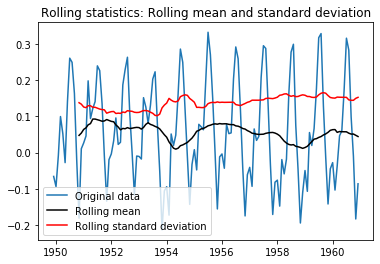

In [69]:
stationarity_test(dataLogMinusMovingAverage)

Stationary p-value < 0.05  and test stat < critical value at .05 significance.Aautocorrelation plot decays fastly --> Stationary
3. calculating exponential weighted average of dataLog - Another transformation 

In [76]:
dataLog.ewm?

            passengers
Month                 
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
...                ...
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461

[144 rows x 1 columns]


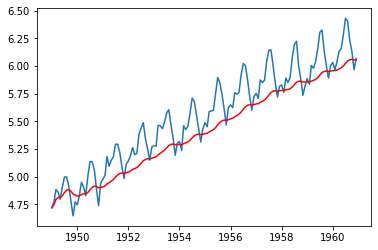

In [77]:
exponentialDecayWeightedAverage = dataLog.ewm(halflife=12, min_periods=0, adjust=True).mean()
print(exponentialDecayWeightedAverage)
plt.plot(dataLog)
plt.plot(exponentialDecayWeightedAverage, color='red');

 Trend appears to be in the TS since the exponentialDecayWeightedAverage plot increases with time
 therefore, we need another transformation to remove the trend by subtracting the weighted mean


            passengers
Month                 
1949-01-01    0.000000
1949-02-01    0.025339
1949-03-01    0.088967
1949-04-01    0.048028
1949-05-01   -0.012415
...                ...
1960-08-01    0.360435
1960-09-01    0.173704
1960-10-01    0.072319
1960-11-01   -0.089603
1960-12-01    0.011964

[144 rows x 1 columns]
Augmented Dickey Fuller Result
Test Statistics            -3.601262
p-value                     0.005737
no of lag used             13.000000
no of observation used    130.000000
Critical Value1%           -3.481682
Critical Value5%           -2.884042
Critical Value10%          -2.578770
dtype: float64


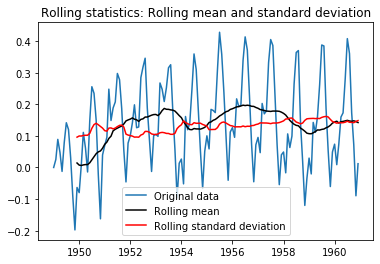

In [78]:
dataLogMinusexponentialDecayWeightedAverage = dataLog - exponentialDecayWeightedAverage
print(dataLogMinusexponentialDecayWeightedAverage)
stationarity_test(dataLogMinusexponentialDecayWeightedAverage)

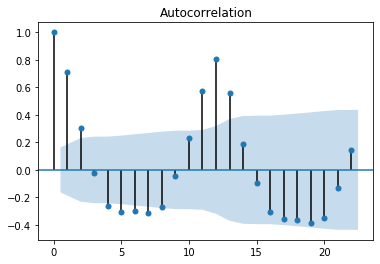

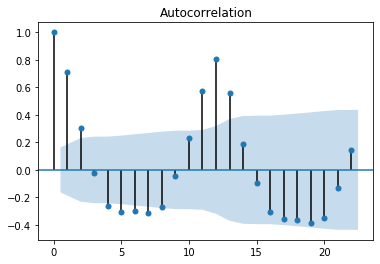

In [80]:
plot_acf(dataLogMinusexponentialDecayWeightedAverage)

More stationary than using the simple average. Although, mean is less constant, std is more constant
autocorrelation plot decays fastly --> Stationary
4. making TS stationary by removing its shift(lag=1 here)

            passengers
Month                 
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Augmented Dickey Fuller Result
Test Statistics            -2.717131
p-value                     0.071121
no of lag used             14.000000
no of observation used    128.000000
Critical Value1%           -3.482501
Critical Value5%           -2.884398
Critical Value10%          -2.578960
dtype: float64


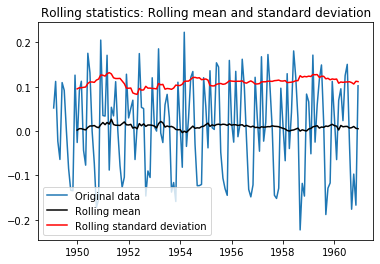

In [145]:
dataLogDiffShifting = dataLog.diff(periods=1)
#dataLogDiffShifting = dataLog - dataLog.shift()
dataLogDiffShifting.dropna(inplace=True)
print(dataLogDiffShifting.head(5))
stationarity_test(dataLogDiffShifting)

p value > critical value but test stat < critical value, --> stationary

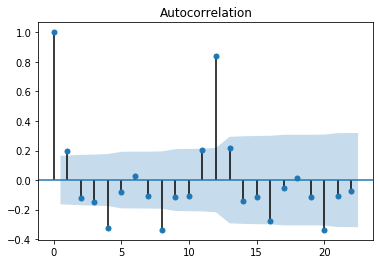

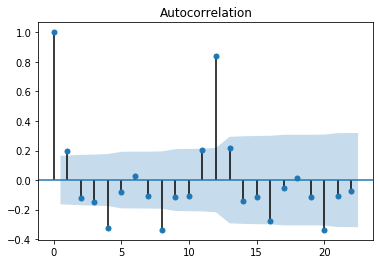

In [71]:
plot_acf(dataLogDiffShifting)

In [ ]:
Autocorrelation plot decays fastly --> Stationary

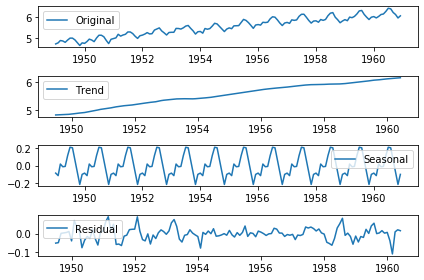

In [156]:
# Finding the components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataLog)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataLog, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

Augmented Dickey Fuller Result
Test Statistics          -6.332387e+00
p-value                   2.885059e-08
no of lag used            9.000000e+00
no of observation used    1.220000e+02
Critical Value1%         -3.485122e+00
Critical Value5%         -2.885538e+00
Critical Value10%        -2.579569e+00
dtype: float64


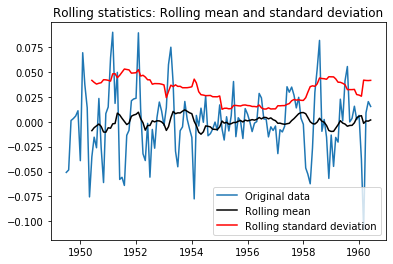

In [15]:
# checking if noise is stationary or not
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
stationarity_test(decomposedLogData)

       passengers
count  132.000000
mean    -0.000866
std      0.033505
min     -0.108624
25%     -0.015421
50%     -0.000013
75%      0.015892
max      0.089858


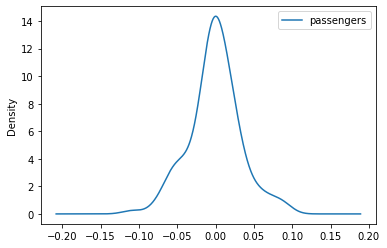

In [166]:
# plot timeseries error
residual.plot(kind='kde')
print(residual.describe())

Since noise is not stationary, we have to integrate(use) the moving average to smoothen and set out to predict what happens in future. kDE plot also shows that noise does not have zero mean

# Calculate P and Q values

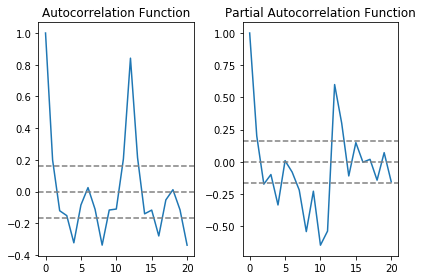

In [81]:
# plotting acf and pacf graph to know the value of P and Q respectively
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataLogDiffShifting, nlags=20);
lag_pacf = pacf(dataLogDiffShifting, nlags=20, method='ols');

# plotting acf - to calculate Q
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# plotting pacf - to calculate P
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

P and Q values respectively are the horizontal values where the graphs cuts off (drop to) zero for the first time in pacf and acf graph resp.Where it touches the confidence level at zero
From the graphs above, P=2 & Q=2 with lag, d=1

# Building ARIMA model

Plotting the ARIMA model
aic value = -287.2808079216292


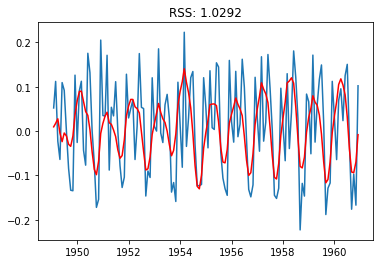

In [154]:
# ARIMA model
model = ARIMA(dataLog, order=(2,1,2))
model_fit = model.fit(disp=5)
plt.plot(dataLogDiffShifting)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues - dataLogDiffShifting['passengers'])**2))
print('Plotting the ARIMA model');
print('aic value = {}'.format(model_fit.aic))

In [149]:
model.fit?

In [85]:
model_fit.fittedvalues.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

Plotting the ARIMA model
aic value = -237.60463569752807


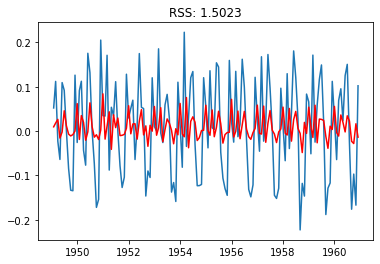

In [152]:
# ARIMA model
model = ARIMA(dataLog, order=(2,1,0))
model_fit = model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues - dataLogDiffShifting['passengers'])**2))
print('Plotting the ARIMA model');
print('aic value = {}'.format(model_fit.aic))

Plotting the ARIMA model
aic value = -240.3789540202502


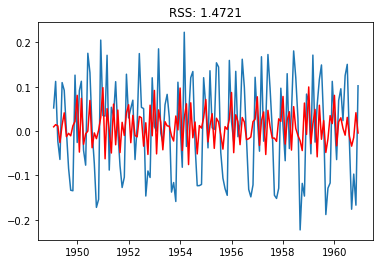

In [153]:
# ARIMA model
model = ARIMA(dataLog, order=(0,1,2))
model_fit = model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues - dataLogDiffShifting['passengers'])**2))
print('Plotting the ARIMA model');
print('aic value = {}'.format(model_fit.aic))

It can be observed that we have the lowest SS and AIC values when P=2, d=1, Q=2 --> these are our best values

In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 07 Nov 2019   AIC                           -287.281
Time:                        10:09:51   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.passengers    -0.8946      0.039    -23.127      0.000      -0.970      -0.819
ma.L1.D.passengers    -1.8270      0.036    -51.303      0.000      -1.897      -1.757
ma.L2.D.passengers     0.9245      0.036     25.568      0.000       0.854       0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9106           -0.5372j            1.0573           -0.0848
AR.2            0.9106           +0.5372j            1.0573            0.0848
MA.1            0.9881           -0.3245j            1.0400           -0.0505
MA.2            0.9881           +0.3245j            1.0400            0.0505
-----------------------------------------------------------------------------
"""

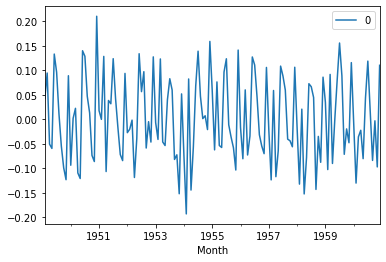

                0
count  143.000000
mean     0.001691
std      0.085116
min     -0.193387
25%     -0.063327
50%     -0.005020
75%      0.074605
max      0.210671


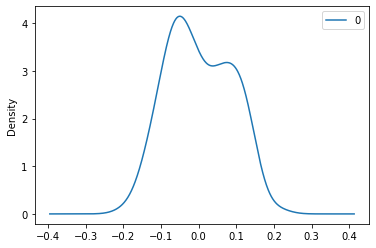

In [167]:
# plot residual errors of the model
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
print(residuals.describe())

In [ ]:
The non centred mean and bimodes indicates the residual error in the model is biased

In [88]:
predArimaDiff = pd.Series(model_fit.fittedvalues, copy=True)
print(predArimaDiff)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [90]:
# converting to cum sum
predArimaDiffCumsum = predArimaDiff.cumsum()
print(predArimaDiffCumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372552
1960-09-01    1.280202
1960-10-01    1.186189
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64


In [98]:
dataLog['passengers']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: passengers, Length: 144, dtype: float64

In [99]:
# PREDICTIONS
predictions_ARIMA_log = pd.Series(dataLog['passengers'].ix[0], index=dataLog.index)
print(predictions_ARIMA.head())
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    112.000000
1949-02-01    113.257680
1949-03-01    115.228617
1949-04-01    117.995187
1949-05-01    117.070278
dtype: float64


C:\Users\acces\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.729666
1949-03-01    4.746918
1949-04-01    4.770644
1949-05-01    4.762774
dtype: float64

In [92]:
dataLog['passengers'].iloc[0]

4.718498871295094

In [91]:
# PREDICTIONS
predArimaLog = pd.Series(dataLog['passengers'].iloc[0], index=dataLog.index)
print(predArimaLog)
predArimaLog = predArimaLog.add(predArimaDiffCumsum, fill_value=0)
predArimaLog.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073410
1949-04-01    118.301971
1949-05-01    117.768347
                 ...    
1960-08-01    441.885533
1960-09-01    402.905076
1960-10-01    366.752764
1960-11-01    341.984155
1960-12-01    339.216219
Length: 144, dtype: float64


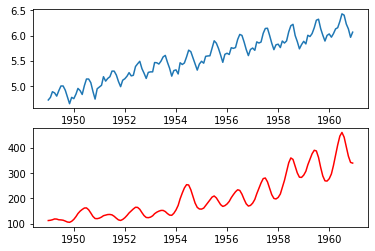

In [102]:
# take the EXPONENT THE LOG BACK
predARIMA = np.exp(predArimaLog)
print(predARIMA)
plt.subplot(211)
plt.plot(dataLog)
plt.subplot(212)
plt.plot(predARIMA, color='red')

In [103]:
# evalaute
from sklearn.metrics import mean_squared_error
error = mean_squared_error(data,predARIMA)
error

8118.854163263905

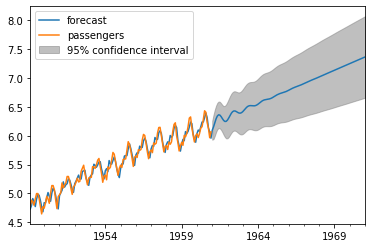

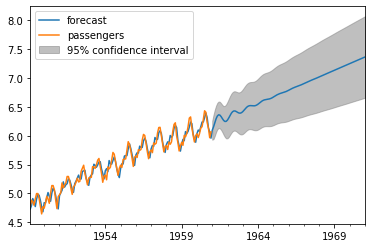

In [104]:
model_fit.plot_predict(1,264)

In [106]:
# pred for train only
from sklearn.metrics import mean_squared_error
error = mean_squared_error(data,predARIMA)
error

8118.854163263905

In [131]:
model_fit.predict()

1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Freq: MS, Length: 143, dtype: float64

In [130]:
model_fit.forecast?
pred_log

array([6.09553395, 6.15281408, 6.22442972, 6.29241107, 6.34164721,
       6.36359363, 6.35784683, 6.33139298, 6.29597532, 6.26447705,
       6.24738318, 6.25025166, 6.27275833, 6.30940312, 6.35151495,
       6.38988657, 6.41727381, 6.43011051, 6.42906682, 6.41842479,
       6.40456142, 6.39403602, 6.3918307 , 6.40019493, 6.41833685,
       6.44295403, 6.46937432, 6.49293982, 6.51024114, 6.51989025,
       6.52267567, 6.52112373, 6.51864511, 6.51853673, 6.52311907,
       6.53322347, 6.54812858, 6.56591548, 6.584103  , 6.60036531,
       6.61313256, 6.62192768, 6.62737773, 6.63093111, 6.6343867 ,
       6.63937966, 6.64696487, 6.65739824, 6.6701531 , 6.68414237,
       6.69806612, 6.71077886, 6.72157716, 6.73033966, 6.73749791,
       6.74386358, 6.75037301, 6.75782571, 6.76668661, 6.77699803,
       6.788413  , 6.80032835, 6.81207175, 6.8230874 , 6.83307115,
       6.8420247 , 6.85022289, 6.85811197, 6.86617315, 6.87479126,
       6.88416278, 6.8942636 , 6.90487866, 6.91567914, 6.92632

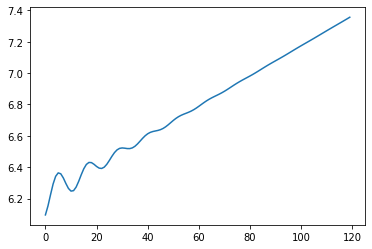

In [129]:
plt.plot(pred_log)